## Observations and Insights

Listed below ar some of the key observations from this Tumor Drug Regimen analysis:
a) Capomulin and Remicane were tested on more mouses than any other drug Regimen 
b) Capomulin is the most successful drugs in fighting tumors, as the tumor count is lower at the last point at whihc these drugs were admiistered.
c) Mouse id- g989 was tested on Propriva and had the highest total tumor volume across all timepoints, proving Propriva to be the most unsuccessful drug in the Regimen pool

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import iqr
import numpy as np
import warnings

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
pd.options.display.float_format = '{:,.5f}'.format
combined_data=pd.merge(mouse_metadata, study_results, on='Mouse ID')
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00000,0
1,k403,Ramicane,Male,21,16,5,38.82590,0
2,k403,Ramicane,Male,21,16,10,35.01427,1
3,k403,Ramicane,Male,21,16,15,34.22399,1
4,k403,Ramicane,Male,21,16,20,32.99773,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
pd.options.display.float_format = '{:,.6f}'.format
grouped_data=combined_data.groupby('Drug Regimen')
tvol_mean=(grouped_data['Tumor Volume (mm3)']).mean()
tvol_median=(grouped_data['Tumor Volume (mm3)']).median()
tvol_variance=(grouped_data['Tumor Volume (mm3)']).var()
tvol_std=(grouped_data['Tumor Volume (mm3)']).std()
tvol_sem=(grouped_data['Tumor Volume (mm3)']).sem()
summary_stats=pd.concat([tvol_mean.to_frame(), tvol_median.to_frame(), tvol_variance.to_frame(), 
                         tvol_std.to_frame(), tvol_sem.to_frame()], axis=1, sort=False)
summary_stats.columns=['mean', 'median', 'variance', 'std', 'sem']
summary_stats


,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

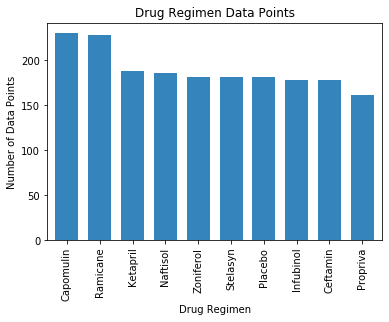

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count_drugs= grouped_data['Drug Regimen'].count()
count_drugs
#generating bar graph using pandas dataframe
count_drugs.sort_values(ascending=False, inplace=True)
count_chart=count_drugs.plot(kind='bar', alpha=0.9, width=0.7)
plt.title('Drug Regimen Data Points')
plt.ylabel('Number of Data Points')
plt.show()

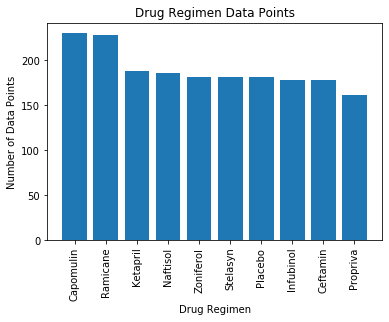

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimen=['Capomulin','Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol','Stelasyn','Placebo', 'Infubinol','Ceftamin','Propriva']
x_axis=np.arange(len(grouped_data['Drug Regimen']))
count_drugs.sort_values(ascending=False, inplace=True)
tick_locations=[value for value in x_axis]
plt.bar(x_axis, count_drugs, alpha=1, align='center')
plt.xticks(tick_locations, regimen, rotation='vertical')
plt.title('Drug Regimen Data Points')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()

## Pie plots

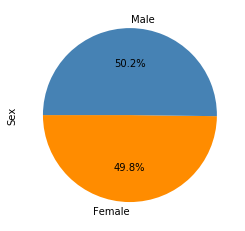

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_group=combined_data.groupby('Sex')['Mouse ID'].nunique()
#mice_group.head()
gender=["Female", "Male"]
spread=[49.8,50.2]
colors=["darkorange", "steelblue"]
mice_group.plot(kind='pie', y='gender', x='spread', autopct='%1.1f%%', colors=colors, startangle=180, labels=gender, fontsize=10)
plt.axes().set_ylabel('Sex')
warnings.filterwarnings('ignore')
plt.show()


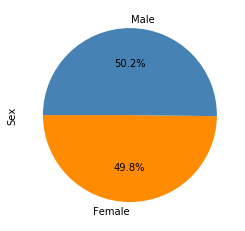

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender=["Female", "Male"]
spread=[49.8,50.2]
colors=["darkorange", "steelblue"]
plt.pie(spread, autopct='%1.1f%%', startangle=180, labels=gender, colors=colors)
plt.axes().set_ylabel('Sex')
warnings.filterwarnings('ignore')
plt.show()

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
pd.options.display.float_format = '{:,.5f}'.format
capomulin_casecount=combined_data[combined_data['Drug Regimen'].str.contains("Capomulin")]
capomulin_grouped=capomulin_casecount.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint', 'Tumor Volume (mm3)'].max()
capomulin_grouped.head(10)

,,Timepoint,Tumor Volume (mm3)
Mouse ID,Drug Regimen,,
b128,Capomulin,45,45.65133
b742,Capomulin,45,45.00000
f966,Capomulin,20,45.00000
g288,Capomulin,45,46.30400
g316,Capomulin,45,46.80922
i557,Capomulin,45,47.68596
i738,Capomulin,45,45.59569
j119,Capomulin,45,48.15821
j246,Capomulin,35,46.40836


In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
pd.options.display.float_format = '{:,.5f}'.format
ceftamin_casecount=combined_data[combined_data['Drug Regimen'].str.contains("Ceftamin")]
ceftamin_grouped=ceftamin_casecount.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint', 'Tumor Volume (mm3)'].max()
ceftamin_grouped.head(10)

,,Timepoint,Age_months,Tumor Volume (mm3)
Mouse ID,Drug Regimen,,,
a275,Ceftamin,45,20,62.99936
b447,Ceftamin,0,2,45.00000
b487,Ceftamin,25,6,56.05775
b759,Ceftamin,30,12,55.74283
f436,Ceftamin,15,3,48.72208
h531,Ceftamin,5,5,47.78468
j296,Ceftamin,45,24,61.84902
k210,Ceftamin,45,15,68.92318
l471,Ceftamin,45,7,67.74866


In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
pd.options.display.float_format = '{:,.5f}'.format
infubinol_casecount=combined_data[combined_data['Drug Regimen'].str.contains("Infubinol")]
infubinol_grouped=infubinol_casecount.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint', 'Tumor Volume (mm3)'].max()
infubinol_grouped.head(10)

,,Timepoint,Age_months,Tumor Volume (mm3)
Mouse ID,Drug Regimen,,,
a203,Infubinol,45,20,67.97342
a251,Infubinol,45,21,65.52574
a577,Infubinol,30,6,57.03186
a685,Infubinol,45,8,66.08307
c139,Infubinol,45,11,72.22673
c326,Infubinol,5,18,45.00000
c895,Infubinol,30,7,60.96971
e476,Infubinol,45,23,62.43540
f345,Infubinol,45,23,60.91877


In [33]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
pd.options.display.float_format = '{:,.5f}'.format
ramicane_casecount=combined_data[combined_data['Drug Regimen'].str.contains("Ramicane")]
ramicane_grouped=ramicane_casecount.groupby(['Mouse ID','Drug Regimen'])['Timepoint', 'Tumor Volume (mm3)'].max()
ramicane_grouped.head(10)

,,Timepoint,Tumor Volume (mm3)
Mouse ID,Drug Regimen,,
a411,Ramicane,45,45.46668
a444,Ramicane,45,45.00000
a520,Ramicane,45,45.00000
a644,Ramicane,45,46.91089
c458,Ramicane,30,45.72228
c758,Ramicane,45,46.94095
d251,Ramicane,45,45.00000
e662,Ramicane,45,46.40908
g791,Ramicane,45,45.85153


In [34]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
#tumor_IQR=iqr(tumor_data['Tumor Volume (mm3)'])
#tumor_IQR
capomulin_IQR=round(iqr(capomulin_grouped['Tumor Volume (mm3)']),2)
ceftamin_IQR=round(iqr(ceftamin_grouped['Tumor Volume (mm3)']),2)
infubinol_IQR=round(iqr(infubinol_grouped['Tumor Volume (mm3)']),2)
ramicane_IQR=round(iqr(ramicane_grouped['Tumor Volume (mm3)']),2)
print(f"Capomulin IQR is: {capomulin_IQR}")
print(f"Ceftamin IQR is: {ceftamin_IQR}")
print(f"Infubinol IQR is: {infubinol_IQR}")
print(f"Ramicane IQR is: {ramicane_IQR}")

Capomulin IQR is: 1.75
Ceftamin IQR is: 15.58
Infubinol IQR is: 11.48
Ramicane IQR is: 1.34


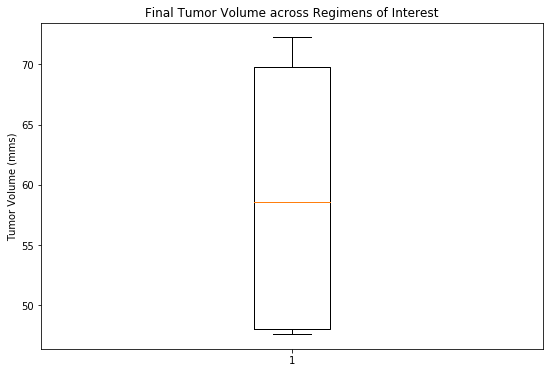

In [45]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin_tumorvol=capomulin_grouped['Tumor Volume (mm3)'].max()
ceftamin_tumorvol=ceftamin_grouped['Tumor Volume (mm3)'].max()
infubinol_tumorvol=infubinol_grouped['Tumor Volume (mm3)'].max()
ramicane_tumorvol=ramicane_grouped['Tumor Volume (mm3)'].max()
ceftamin_tumorvol
final_tumor_vol = (capomulin_tumorvol, ramicane_tumorvol, infubinol_tumorvol, ceftamin_tumorvol)
#fig1, ax1 = plt.subplots()
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(final_tumor_vol)
ax.set_title('Final Tumor Volume across Regimens of Interest')
ax.set_ylabel('Tumor Volume (mms)')
plt.show()



## Line and scatter plots

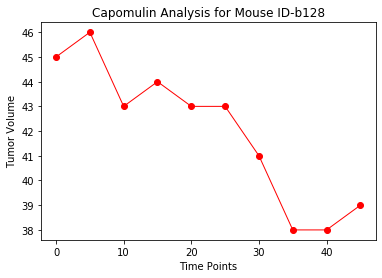

In [36]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_id=combined_data[combined_data['Mouse ID'].str.contains("b128")]
#mouse_id
final_mouseid=mouse_id.drop(['Mouse ID', 'Drug Regimen','Sex', 'Age_months', 'Weight (g)', 'Metastatic Sites'], axis=1)
#final_mouseid
x_axis=np.arange(0,50,5)
tumor_vol=[45, 46,43,44,43,43,41,38,38,39]
plt.plot(x_axis, tumor_vol, marker="o", color="red", linewidth=1)
plt.title('Capomulin Analysis for Mouse ID-b128')
plt.xlabel('Time Points')
plt.ylabel('Tumor Volume')
plt.show()

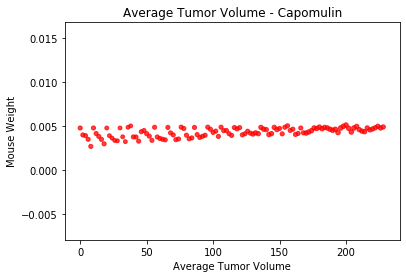

In [46]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_casecount=combined_data[combined_data['Drug Regimen'].str.contains("Capomulin")]
total_tumorvol=capomulin_casecount['Tumor Volume (mm3)'].sum()
mouse_weight=capomulin_casecount.drop(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], axis=1)
tumor_volume=capomulin_casecount.drop(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Timepoint', 'Weight (g)', 'Metastatic Sites'], axis=1)
tumor_volume.head()
avg_tumorvol=mouse_weight['Avg. Tumor volume']=(tumor_volume/total_tumorvol)
mouse_weight
x_axis=np.arange(len(mouse_weight))
x_axis
plt.scatter(x_axis, avg_tumorvol, marker="o", color="red", s=mouse_weight, alpha=0.75)
plt.title("Average Tumor Volume - Capomulin")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Mouse Weight")
plt.show()

In [47]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for, 
#the Capomulin regimen
capomulin_correlation=mouse_weight['Weight (g)'].corr(mouse_weight['Avg. Tumor volume'])
print(f"The correlation coefficient is: {round(capomulin_correlation,2)}")
x_values=mouse_weight['Weight (g)']
y_values=mouse_weight['Avg. Tumor volume']
#Linear regression calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,8)) + "x + " + str(round(intercept,5))

print("---------------------------------------")
print("Linear Regression Results")
print("---------------------------------------")
print(f"The Linear regression line is: {line_eq}")
print(f"The slope is: {slope}")
print(f"The intercept is: {intercept}")
print(f"The r-squared is: {rvalue}")
print(f"The pvalue is: {pvalue}")
print(f"The standard error is: {stderr}")


The correlation coefficient is: 0.53
---------------------------------------
Linear Regression Results
---------------------------------------
The Linear regression line is: y = 0.00010272x + 0.0023
The slope is: 0.00010271766481281481
The intercept is: 0.00229704557904154
The r-squared is: 0.5256995552077165
The pvalue is: 9.605446629502353e-18
The standard error is: 1.100782154407708e-05
